<a href="https://colab.research.google.com/github/GayanthaL/detection-of-CKD-using-machine-learning-techniques/blob/main/dep_local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
from warnings import filterwarnings
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from fancyimpute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [ ]:
#Ignore warnings for more covinience
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Load the dataset using Pandas
import pandas as pd

# Replace 'path_to_your_file' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/My Drive/Research/Sri Lankan CKD Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   id   age  weight gender      cr  cru    al  gl     na    ca    k     cl  \
0   1  72.0    52.0      M  249.43  NaN  34.9 NaN  142.0  2.43  5.0  113.0   
1   2  76.0    52.0      M  216.05  NaN  41.3 NaN  145.0  2.40  4.7  114.0   
2   3  60.0    80.4      M  155.40  NaN  33.7 NaN  135.0  2.00  4.2  103.0   
3   4  65.0    53.4      F  127.50  NaN  41.8 NaN  138.0  2.80  4.4  100.0   
4   5  59.0    60.4      M  172.71  NaN  39.7 NaN  128.0  2.20  3.6   91.0   

     pr  iron     ua   wbc   rbc    hg    plt  class  
0   NaN   NaN  415.8   NaN   NaN   NaN    NaN      1  
1   NaN  13.0    NaN  9.85  3.44  11.3  356.0      1  
2  11.6  12.0    NaN  9.24  4.60   8.4  329.0      1  
3   NaN   NaN  290.7  9.87  4.32  11.7  364.0      1  
4   NaN   NaN  367.8  8.93  4.82  13.8  214.0      1  


In [4]:
# dropping id column
data.drop('id', axis = 1, inplace = True)

In [5]:
# Dictionary mapping abbreviated column names to full names
column_name_mapping = {
    "age": "Age",
    "weight": "Weight",
    "gender": "Gender",
    "cr": "Creatinine",
    "cru": "Creatinine Clearance",
    "al": "Albumin",
    "gl": "Glucose",
    "na": "Sodium",
    "ca": "Calcium",
    "k": "Potassium",
    "cl": "Chloride",
    "wbc": "White Blood Cell Count",
    "rbc": "Red Blood Cell Count",
    "hg": "Hemoglobin",
    "plt": "Platelet Count",
    "class": "Class",  # Assuming "class" is the target variable; leave it as is
    # Add any remaining columns if necessary
}

# Rename columns in the DataFrame
data.rename(columns=column_name_mapping, inplace=True)

# Display the updated DataFrame's columns to confirm renaming
print("Updated column names:")
print(data.columns)

Updated column names:
Index(['Age', 'Weight', 'Gender', 'Creatinine', 'Creatinine Clearance',
       'Albumin', 'Glucose', 'Sodium', 'Calcium', 'Potassium', 'Chloride',
       'pr', 'iron', 'ua', 'White Blood Cell Count', 'Red Blood Cell Count',
       'Hemoglobin', 'Platelet Count', 'Class'],
      dtype='object')


In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns (assuming 'gender' is categorical)
categorical_columns = ['Gender']

# Apply Label Encoding
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the first few rows to verify encoding
print(data.head())

    Age  Weight  Gender  Creatinine  Creatinine Clearance  Albumin  Glucose  \
0  72.0    52.0       1      249.43                   NaN     34.9      NaN   
1  76.0    52.0       1      216.05                   NaN     41.3      NaN   
2  60.0    80.4       1      155.40                   NaN     33.7      NaN   
3  65.0    53.4       0      127.50                   NaN     41.8      NaN   
4  59.0    60.4       1      172.71                   NaN     39.7      NaN   

   Sodium  Calcium  Potassium  Chloride    pr  iron     ua  \
0   142.0     2.43        5.0     113.0   NaN   NaN  415.8   
1   145.0     2.40        4.7     114.0   NaN  13.0    NaN   
2   135.0     2.00        4.2     103.0  11.6  12.0    NaN   
3   138.0     2.80        4.4     100.0   NaN   NaN  290.7   
4   128.0     2.20        3.6      91.0   NaN   NaN  367.8   

   White Blood Cell Count  Red Blood Cell Count  Hemoglobin  Platelet Count  \
0                     NaN                   NaN         NaN             N

In [7]:
# Calculate missing value percentage for each column
missing_percentage = data.isnull().mean() * 100

# Identify columns to drop based on the 80% missing value threshold
threshold = 80
cols_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop the identified columns
data.drop(columns=cols_to_drop, inplace=True)

# Display the remaining columns and their info
print("Columns after dropping those with more than 80% missing values:")
print(data.info())

Columns after dropping those with more than 80% missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     405 non-null    float64
 1   Weight                  402 non-null    float64
 2   Gender                  406 non-null    int64  
 3   Creatinine              390 non-null    float64
 4   Albumin                 207 non-null    float64
 5   Sodium                  366 non-null    float64
 6   Calcium                 91 non-null     float64
 7   Potassium               367 non-null    float64
 8   Chloride                213 non-null    float64
 9   White Blood Cell Count  366 non-null    float64
 10  Red Blood Cell Count    363 non-null    float64
 11  Hemoglobin              373 non-null    float64
 12  Platelet Count          370 non-null    float64
 13  Class                   406 non

In [8]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.9 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=fcbdfabb54f97a23f125b50f8c60abf9f866305e4841f628b63ff19526967ba5
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=37500ada16a47ccb645f7d7f3f2e06e753cbd219c6a215b4fea32fed7c885017
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


In [9]:
from sklearn.experimental import enable_iterative_imputer  # Enable experimental iterative imputer
from fancyimpute import IterativeImputer

# MICE Imputation using fancyimpute's IterativeImputer
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
data_iter_imputed = pd.DataFrame(mice_imputer.fit_transform(data), columns=data.columns)
print("\nMICE Imputation:")
print(data_iter_imputed.head())


MICE Imputation:
    Age  Weight  Gender  Creatinine  Albumin  Sodium  Calcium  Potassium  \
0  72.0    52.0     1.0      249.43     34.9   142.0     2.43        5.0   
1  76.0    52.0     1.0      216.05     41.3   145.0     2.40        4.7   
2  60.0    80.4     1.0      155.40     33.7   135.0     2.00        4.2   
3  65.0    53.4     0.0      127.50     41.8   138.0     2.80        4.4   
4  59.0    60.4     1.0      172.71     39.7   128.0     2.20        3.6   

   Chloride  White Blood Cell Count  Red Blood Cell Count  Hemoglobin  \
0     113.0                7.898541              3.990003   11.093988   
1     114.0                9.850000              3.440000   11.300000   
2     103.0                9.240000              4.600000    8.400000   
3     100.0                9.870000              4.320000   11.700000   
4      91.0                8.930000              4.820000   13.800000   

   Platelet Count  Class  
0      262.760974    1.0  
1      356.000000    1.0  
2    

In [10]:
data_iter_imputed = data_iter_imputed.drop(['Weight','Gender','Platelet Count'], axis = 1)

In [11]:
data_iter_imputed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     406 non-null    float64
 1   Creatinine              406 non-null    float64
 2   Albumin                 406 non-null    float64
 3   Sodium                  406 non-null    float64
 4   Calcium                 406 non-null    float64
 5   Potassium               406 non-null    float64
 6   Chloride                406 non-null    float64
 7   White Blood Cell Count  406 non-null    float64
 8   Red Blood Cell Count    406 non-null    float64
 9   Hemoglobin              406 non-null    float64
 10  Class                   406 non-null    float64
dtypes: float64(11)
memory usage: 35.0 KB


In [12]:
# Define features (X) and target variable (y)
X_iter_Notscaled = data_iter_imputed.drop('Class', axis=1)  # Features (all columns except 'Class')
y_iter = data_iter_imputed['Class']  # Target variable

### If **needed**

In [ ]:
#save to csv data_iter_imputed
data_iter_imputed.to_csv('/content/drive/MyDrive/Data_mining/data_iter_imputed.csv', index=False)

In [ ]:
# Step 1: Read the CSV file
file_path = "/content/drive/MyDrive/Data_mining/data_iter_imputed.csv"  # Replace with your CSV file's path
data_iter_imputed = pd.read_csv(file_path)

In [ ]:
# Import necessary libraries for scaling
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Scale the Iterative Imputer (MICE) imputed data
X_iter_scaled = pd.DataFrame(scaler.fit_transform(data_iter_imputed.drop('Class', axis=1)), columns=data_iter_imputed.columns[:-1])
y_iter = data_iter_imputed['Class']

print("\nIterative Imputer (MICE) Scaled Data:")
print(X_iter_scaled.head())


Iterative Imputer (MICE) Scaled Data:
        Age  Creatinine   Albumin    Sodium   Calcium  Potassium  Chloride  \
0  0.963855    0.484127 -0.553580  0.666667  0.769735   0.623225  1.872811   
1  1.156627    0.345168  0.748350  1.166667  0.630798   0.350498  2.018280   
2  0.385542    0.092687 -0.797692 -0.500000 -1.221685  -0.104047  0.418126   
3  0.626506   -0.023458  0.850063  0.000000  2.483282   0.077771 -0.018279   
4  0.337349    0.164748  0.422867 -1.666667 -0.295443  -0.649502 -1.327496   

   White Blood Cell Count  Red Blood Cell Count  Hemoglobin  
0               -0.067195             -0.411288   -0.414455  
1                0.590416             -0.854839   -0.361290  
2                0.384855              0.080645   -1.109677  
3                0.597155             -0.145161   -0.258065  
4                0.280390              0.258065    0.283871  


In [ ]:
sse = scaler.transform(One_raw)

In [ ]:
sse

array([[ -2.47583103,  -0.55432787,  -7.48024126, -23.        ,
          1.01649313,  -3.85152862, -14.56779045,  -2.52764493,
         -3.74609781,  -3.34401665]])

In [ ]:
X_iter_scaled.describe()

Age  Creatinine     Albumin      Sodium       Calcium  \
count  406.000000  406.000000  406.000000  406.000000  4.060000e+02   
mean    -0.045835    0.598042   -0.121527    0.046600 -9.566189e-02   
std      0.687921    1.276777    1.044563    0.910151  1.027973e+00   
min     -1.927711   -0.426350   -5.415475   -4.000000 -5.621333e+00   
25%     -0.481928   -0.204274   -0.538735   -0.500000 -5.501548e-01   
50%      0.000000    0.000000    0.000000    0.000000  1.028691e-15   
75%      0.518072    0.795726    0.461265    0.500000  4.498452e-01   
max      1.542169    6.653989    3.433580    2.333333  8.503852e+00   

          Potassium    Chloride  White Blood Cell Count  Red Blood Cell Count  \
count  4.060000e+02  406.000000            4.060000e+02            406.000000   
mean   3.752666e-02    0.018859            4.183346e-02              0.034432   
std    6.900851e-01    0.930704            7.817869e-01              0.717356   
min   -1.831320e+00   -5.982489           -1.667377e+00             -1.604839   
25%   -4.676838e-01   -0.454685           -5.342685e-01             -0.467742   
50%   -4.037569e-16    0.000000           -2.992398e-16              0.000000   
75%    5.323162e-01    0.545315            4.657315e-01              0.532258   
max    2.805043e+00    5.509524            3.518807e+00              1.685484   

       Hemoglobin  
count  406.000000  
mean    -0.002285  
std      0.653792  
min     -1.729032  
25%     -0.464516  
50%      0.000000  
75%      0.535484  
max      1.316129

###With Data Balancing

In [13]:
# Import necessary libraries for SMOTE
from imblearn.over_sampling import SMOTE

# Function to apply SMOTE
def apply_smote(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

# Apply SMOTE to Iterative Imputer (MICE) scaled data
X_iter_resampled, y_iter_resampled = apply_smote(X_iter_Notscaled, y_iter)
print("\nIterative Imputer (MICE) Resampled Target Class Distribution:")
print(pd.Series(y_iter_resampled).value_counts())


Iterative Imputer (MICE) Resampled Target Class Distribution:
Class
1.0    223
0.0    223
Name: count, dtype: int64


In [14]:
X = X_iter_resampled
y = y_iter_resampled

###Without Data Balancing

In [ ]:
X = X_iter_Notscaled
y = y_iter

### **Common part**

In [16]:
# Import necessary libraries for splitting the data
from sklearn.model_selection import train_test_split

# Function to split the data
def split_data(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

# Call the split_data function to create X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split_data(X, y) # Assuming X and y are defined as in ipython-input-15-f4f64fd73458


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Best parameters from your GridSearchCV result
best_params = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2
}

# Initialize the Random Forest model with the best parameters
best_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# Train the model
best_model.fit(X_train, y_train)

# Evaluate on the training data
y_pred_train = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Evaluate on the test data
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report on Test Data:\n")
print(classification_report(y_test, y_pred_test))


Training Accuracy: 1.0
Test Accuracy: 0.9666666666666667

Classification Report on Test Data:

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        46
         1.0       0.96      0.98      0.97        44

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



In [18]:
X_train.shape

(356, 10)

In [ ]:
X_train.head()

Age  Creatinine    Albumin  Sodium   Calcium  Potassium    Chloride  \
177  32.0     762.750  27.700000   120.0  1.700000        3.4   84.000000   
299  63.0      79.578  40.527542   150.0  2.305313        5.0  111.479715   
315  66.0      97.262  37.625564   140.0  2.184324        3.6  101.773589   
32   56.0     182.410  42.200000   138.0  2.100000        4.7  104.000000   
14   70.0     271.360  34.495736   133.0  2.094561        5.0  101.000000   

     White Blood Cell Count  Red Blood Cell Count  Hemoglobin  
177                    5.57                  3.79        11.3  
299                    7.30                  4.70        13.4  
315                   11.00                  4.90        13.6  
32                     6.32                  3.21         9.8  
14                    11.89                  4.71        13.7

In [ ]:
data_iter_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     406 non-null    float64
 1   Creatinine              406 non-null    float64
 2   Albumin                 406 non-null    float64
 3   Sodium                  406 non-null    float64
 4   Calcium                 406 non-null    float64
 5   Potassium               406 non-null    float64
 6   Chloride                406 non-null    float64
 7   White Blood Cell Count  406 non-null    float64
 8   Red Blood Cell Count    406 non-null    float64
 9   Hemoglobin              406 non-null    float64
 10  Class                   406 non-null    float64
dtypes: float64(11)
memory usage: 35.0 KB


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 161 to 2
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     324 non-null    float64
 1   Creatinine              324 non-null    float64
 2   Albumin                 324 non-null    float64
 3   Sodium                  324 non-null    float64
 4   Calcium                 324 non-null    float64
 5   Potassium               324 non-null    float64
 6   Chloride                324 non-null    float64
 7   White Blood Cell Count  324 non-null    float64
 8   Red Blood Cell Count    324 non-null    float64
 9   Hemoglobin              324 non-null    float64
dtypes: float64(10)
memory usage: 27.8 KB


In [ ]:
y_pred_trainOne = best_model.predict(X_train.iloc[[0]])

In [ ]:
y_pred_trainOne

array([1.])

In [ ]:
y_test.iloc[[0]]

11    0.0
Name: Class, dtype: float64

###Save the Model

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(best_model, "/content/drive/MyDrive/model/random_forest_model.pkl")

['/content/drive/MyDrive/model/random_forest_model.pkl']

In [ ]:
import joblib

In [ ]:
loaded_model = joblib.load("/content/drive/MyDrive/model/random_forest_model.pkl")

In [ ]:
y_pred_trainOne_2= loaded_model.predict(X_test.iloc[[0]])

In [ ]:
y_pred_trainOne_2

array([0.])

--------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
One_raw = data_iter_imputed.iloc[[0]]

In [ ]:
One_raw

Age  Creatinine  Albumin  Sodium  Calcium  Potassium  Chloride  \
0  72.0      249.43     34.9   142.0     2.43        5.0     113.0   

   White Blood Cell Count  Red Blood Cell Count  Hemoglobin  Class  
0                7.898541              3.990003   11.093988    1.0

In [ ]:
One_raw_X_iter_scaled = pd.DataFrame(scaler.transform(One_raw.drop('Class', axis=1)))

In [ ]:
One_raw_X_iter_scaled

0         1        2         3         4         5         6  \
0  0.963855  0.484127 -0.55358  0.666667  0.769735  0.623225  1.872811   

          7         8         9  
0 -0.067195 -0.411288 -0.414455

In [ ]:
y_pred_trainOne_te = loaded_model.predict(One_raw_X_iter_scaled)

In [ ]:
y_pred_trainOne_te

array([1.])

###Save the Scaler (If needed)

In [ ]:
# Save the scaler
joblib.dump(scaler, "/content/drive/MyDrive/Data_mining/robust_scaler.pkl")

['/content/drive/MyDrive/Data_mining/robust_scaler.pkl']

In [ ]:
X_test

Age  Creatinine   Albumin    Sodium   Calcium  Potassium  Chloride  \
11   0.192771   -0.187893 -0.695979 -0.666667  0.193629   0.168680 -0.163748   
43  -0.771084    0.097933 -0.455923 -0.333333  0.295125   0.168680  0.272658   
391  1.108434    0.349498  0.011143  1.166667 -0.027215   0.805043  0.854532   
298 -0.963855   -0.149336  0.479534  0.666667 -0.045771   0.168680  0.671861   
402 -0.289157    0.324978 -0.085699  1.000000  0.630798  -0.013138  0.709063   
..        ...         ...       ...       ...       ...        ...       ...   
28   0.578313   -0.097433 -0.089212 -0.833333 -0.162538   0.441407 -0.309216   
148 -0.144578    4.333286 -0.167070  0.166667 -0.758564   2.532316  0.272658   
195 -0.289157    1.502252 -0.465997  0.000000 -0.549524  -0.376775  0.272658   
99  -0.240964    3.451455 -3.198125  0.166667 -1.234088  -0.558593 -0.600153   
167  0.192771    2.339123 -1.367286 -0.666667 -1.134238   1.077771 -0.454685   

     White Blood Cell Count  Red Blood Cell Count  Hemoglobin  
11                 0.278300              0.143464    0.058990  
43                 0.937509             -0.750000   -0.541935  
391               -0.073443             -0.870968   -0.825806  
298               -0.471084              1.129032    0.412903  
402               -0.518262              0.169355    0.361290  
..                      ...                   ...         ...  
28                 0.162446             -0.322581   -0.309677  
148               -0.551960             -1.225806   -1.058065  
195               -0.680014             -0.258065    0.051613  
99                -1.178750             -0.548387   -0.387097  
167               -0.575549             -1.088710   -0.877419  

[82 rows x 10 columns]

In [ ]:
loaded_scaler = joblib.load("/content/drive/MyDrive/Data_mining/robust_scaler.pkl")

In [ ]:
X_train.shape

(324, 10)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(324, 10)
(82, 10)


###Save individuaol raw files

In [ ]:
import pandas as pd
import os

In [ ]:
# Step 1: Read the CSV file
file_path = "/content/drive/MyDrive/Data_mining/data_iter_imputed.csv"  # Replace with your CSV file's path
data = pd.read_csv(file_path)

In [ ]:
data.head(30)

Age  Creatinine    Albumin      Sodium   Calcium  Potassium   Chloride  \
0   72.0      249.43  34.900000  142.000000  2.430000   5.000000  113.00000   
1   76.0      216.05  41.300000  145.000000  2.400000   4.700000  114.00000   
2   60.0      155.40  33.700000  135.000000  2.000000   4.200000  103.00000   
3   65.0      127.50  41.800000  138.000000  2.800000   4.400000  100.00000   
4   59.0      172.71  39.700000  128.000000  2.200000   3.600000   91.00000   
5   47.0      189.07  35.061912  143.000000  2.316382   5.500000  110.00000   
6   65.0      191.24  36.400000  141.000000  2.100000   3.300000  103.00000   
7   52.0      163.80  33.500000  137.000000  2.500000   3.600000  100.00000   
8   42.0      141.30  41.000000  135.000000  2.200000   5.000000  104.00000   
9   60.0      246.50  35.558928  128.000000  2.216002   4.200000   95.00000   
10  65.0      202.95  21.400000  152.000000  2.290912   5.200000  111.00000   
11  56.0       88.00  34.200000  134.000000  2.305604   4.500000   99.00000   
12  61.0       61.02  37.267205  138.000000  2.343166   4.300000  104.00000   
13  60.0      787.41  33.425776  129.000000  1.866178   3.200000   88.00000   
14  70.0      271.36  34.495736  133.000000  2.094561   5.000000  101.00000   
15  51.0      125.19  37.500000  142.000000  1.900000   4.100000  103.00000   
16  38.0      136.71  33.500000  140.000000  2.000000   4.400000  103.00000   
17  56.0      213.50  37.616992  126.000000  2.127786   3.700000   87.00000   
18  68.0      247.74  35.642380  133.000000  2.133977   2.300000   97.00000   
19  33.0       82.74  38.700000  139.000000  2.396732   3.800000   98.00000   
20  27.0       79.28  34.500000  141.000000  2.391576   3.500000   98.00000   
21  66.0       89.55  36.536223  133.000000  2.413753   4.700000   94.00000   
22  24.0       79.15  35.760720  134.000000  2.401519   3.600000   99.00000   
23  36.0      291.72  35.773916  133.000000  2.200000   2.800000   92.00000   
24  63.0      229.17  37.989028  133.000000  2.189743   4.300000   93.00000   
25  68.0      304.98  38.700000  139.000000  2.200000   4.700000  100.00000   
26  72.0      171.20  36.389760  136.232776  2.312877   4.378391   99.42581   
27  57.0      271.58  37.278800  138.000000  2.234129   4.400000   99.00000   
28  64.0      109.73  37.182733  133.000000  2.228698   4.800000   98.00000   
29  78.0      777.02  32.362990  132.000000  1.816969   3.800000   96.00000   

    White Blood Cell Count  Red Blood Cell Count  Hemoglobin  Class  
0                 7.898541              3.990003   11.093988    1.0  
1                 9.850000              3.440000   11.300000    1.0  
2                 9.240000              4.600000    8.400000    1.0  
3                 9.870000              4.320000   11.700000    1.0  
4                 8.930000              4.820000   13.800000    1.0  
5                 7.740000              2.800000    8.200000    1.0  
6                 8.400000              3.490000   11.000000    1.0  
7                 8.210000              4.090000   12.100000    1.0  
8                 6.120000              4.400000   10.000000    1.0  
9                 5.290000              3.920000   11.900000    1.0  
10               13.570000              4.220000   13.100000    1.0  
11                8.923796              4.677896   12.928586    0.0  
12                5.820000              3.810000   12.200000    0.0  
13                8.720000              4.200000   11.100000    1.0  
14               11.890000              4.710000   13.700000    1.0  
15                6.960000              4.530000   13.200000    1.0  
16                7.507324              4.358651   12.094353    1.0  
17                6.880000              3.640000   11.800000    1.0  
18                7.620000              4.550000   13.100000    1.0  
19                9.940000              4.800000   13.800000    0.0  
20               10.130000              5.320000   15.300000    0.0  
21             

In [ ]:
datac = data.drop(columns = 'Class', axis = 1)

In [ ]:

# Step 4: Create a directory to store individual row files
output_dir = "/content/drive/MyDrive/Data_mining/one raw data"
os.makedirs(output_dir, exist_ok=True)

# Step 5: Iterate over each row and save it as a separate CSV file
for idx, row in datac.iterrows():
    row_df = row.to_frame().T  # Convert the row to a DataFrame
    output_file = os.path.join(output_dir, f"row_{idx + 1}.csv")
    row_df.to_csv(output_file, index=False)
    print(f"Row {idx + 1} saved to {output_file}")

print(f"All rows have been saved as individual CSV files in the '{output_dir}' directory.")

Row 1 saved to /content/drive/MyDrive/Data_mining/one raw data/row_1.csv
Row 2 saved to /content/drive/MyDrive/Data_mining/one raw data/row_2.csv
Row 3 saved to /content/drive/MyDrive/Data_mining/one raw data/row_3.csv
Row 4 saved to /content/drive/MyDrive/Data_mining/one raw data/row_4.csv
Row 5 saved to /content/drive/MyDrive/Data_mining/one raw data/row_5.csv
Row 6 saved to /content/drive/MyDrive/Data_mining/one raw data/row_6.csv
Row 7 saved to /content/drive/MyDrive/Data_mining/one raw data/row_7.csv
Row 8 saved to /content/drive/MyDrive/Data_mining/one raw data/row_8.csv
Row 9 saved to /content/drive/MyDrive/Data_mining/one raw data/row_9.csv
Row 10 saved to /content/drive/MyDrive/Data_mining/one raw data/row_10.csv
Row 11 saved to /content/drive/MyDrive/Data_mining/one raw data/row_11.csv
Row 12 saved to /content/drive/MyDrive/Data_mining/one raw data/row_12.csv
Row 13 saved to /content/drive/MyDrive/Data_mining/one raw data/row_13.csv
Row 14 saved to /content/drive/MyDrive/Data

### **Find the contribution**

In [19]:
!pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=76cbd59fb0fc2fd05be413db5aebc41b7f3c3bf6ba095ffe3cf105d68ccac720
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [20]:
# Import necessary libraries
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

# Create a LIME explainer
# Ensure the training data and feature names are consistent with your model
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,  # Convert the training data to a NumPy array
    feature_names=X_train.columns.tolist(),  # List of feature names
    class_names=['No CKD', 'CKD'],  # Replace with your actual class labels if different
    mode='classification',  # Specify classification mode
    discretize_continuous=True  # Discretize continuous features for better interpretability
)

# Select an instance to explain from the test set
instance_idx = 0  # Adjust index as needed
instance_to_explain = X_test.iloc[instance_idx]

# Generate LIME explanation
lime_exp = explainer.explain_instance(
    data_row=instance_to_explain.values,  # Instance as a NumPy array
    predict_fn=best_model.predict_proba  # Probability predictions for classification tasks
)

# Display LIME explanation in a notebook
lime_exp.show_in_notebook(show_table=True, show_all=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


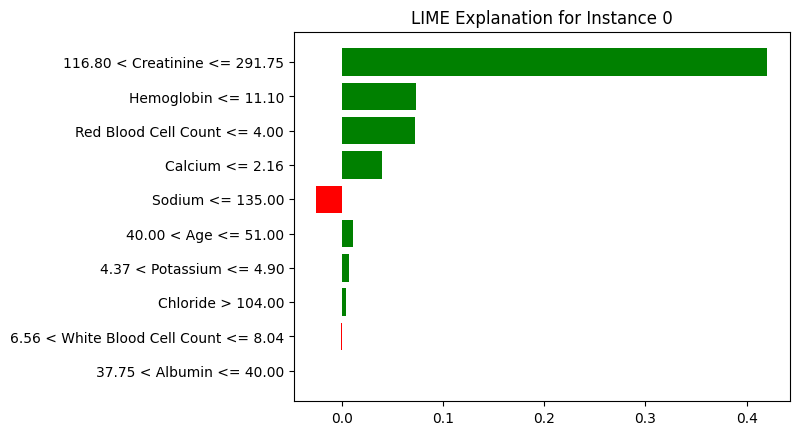

In [21]:
# Save the explanation as a plot (for non-notebook environments or documentation purposes)
lime_fig = lime_exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Instance {instance_idx}")
plt.show()


In [ ]:
import lime
import lime.lime_tabular
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Save the explainer's configuration
explainer_config = {
    "training_data": X_train.values,  # Convert training data to NumPy array
    "feature_names": X_train.columns.tolist(),  # Feature names
    "class_names": ['No CKD', 'CKD'],  # Class labels
    "mode": 'classification',
    "discretize_continuous": True
}

# Save the configuration using joblib
explainer_config_path = "/content/drive/MyDrive/Data_mining/lime_explainer_config.pkl"
with open(explainer_config_path, 'wb') as config_file:
    joblib.dump(explainer_config, config_file)

print(f"LIME explainer configuration saved at {explainer_config_path}")


LIME explainer configuration saved at /content/drive/MyDrive/Data_mining/lime_explainer_config.pkl


In [22]:
import joblib

In [23]:
# Load the saved configuration
loaded_config = joblib.load("/content/drive/MyDrive/Data_mining/lime_explainer_config.pkl")

# Recreate the LIME explainer using the configuration
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=loaded_config["training_data"],
    feature_names=loaded_config["feature_names"],
    class_names=loaded_config["class_names"],
    mode=loaded_config["mode"],
    discretize_continuous=loaded_config["discretize_continuous"]
)

print("LIME explainer recreated successfully!")


LIME explainer recreated successfully!


Check about saved successfully

In [24]:
test_csv=pd.read_csv('/content/drive/MyDrive/Data_mining/Test_rows/row_1.csv')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


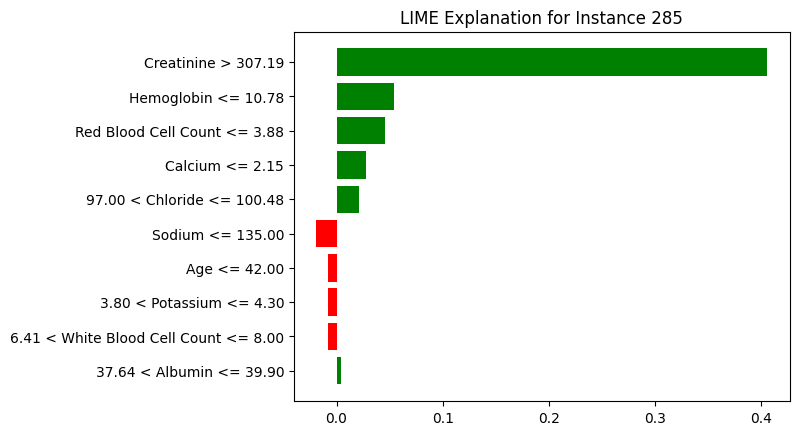

In [27]:
# Select an instance to explain from the test set
instance_idx = 285  # Adjust the index as needed
#instance_to_explain = X_test.iloc[instance_idx]
test_csv_numpy = test_csv.to_numpy()

# Generate LIME explanation
lime_exp = explainer.explain_instance(
    data_row=test_csv_numpy[0],  # Pass the first row of the NumPy array directly
    predict_fn=best_model.predict_proba  # Probability predictions for classification tasks
)

# Display the explanation in a notebook
lime_exp.show_in_notebook(show_table=True, show_all=False)

# Visualize the explanation as a plot
lime_fig = lime_exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Instance {instance_idx}")
plt.show()

### **Seperate Test set**

In [ ]:
X_test

Age  Creatinine    Albumin  Sodium   Calcium  Potassium    Chloride  \
228  23.0      97.262  39.600000   145.0  2.475472        4.0  105.483267   
405  38.0     880.640  38.500000   127.0  1.956879        4.1   99.000000   
82   42.0     122.230  37.500000   131.0  2.278517        3.9   96.000000   
6    65.0     191.240  36.400000   141.0  2.100000        3.3  103.000000   
186  77.0     165.030  38.000000   135.0  2.000000        4.0  100.000000   
..    ...         ...        ...     ...       ...        ...         ...   
289  59.0      61.894  38.749681   147.0  2.417653        4.7  108.978837   
144  48.0     223.870  33.900000   143.0  2.287737        7.3  110.000000   
187  57.0     753.060  32.195101   136.0  2.116579        5.0   97.000000   
245  39.0      53.052  32.500000   137.0  2.297101        3.8  102.468100   
184  56.0     140.970  39.814196   140.0  2.204681        3.8  103.000000   

     White Blood Cell Count  Red Blood Cell Count  Hemoglobin  
228                7.200000              5.000000        14.3  
405                7.960000              3.280000         7.9  
82                 5.640000              3.720000         9.4  
6                  8.400000              3.490000        11.0  
186                5.640000              3.760000        11.1  
..                      ...                   ...         ...  
289                6.700000              4.500000        13.5  
144                4.950000              3.520000         9.0  
187                9.090000              4.280000        12.2  
245                8.166039              4.887807        13.4  
184                7.150000              4.280000        12.9  

[82 rows x 10 columns]

In [ ]:
import os
import pandas as pd

# Specify your Google Drive path where you want to save the files
save_path = "/content/drive/MyDrive/Data_mining/Test_rows"  # Update as needed

# Create the directory if it doesn't exist
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Iterate through the dataset row by row and save each row
for index in range(len(X_test)):
    # Exclude class labels if present
    row_data = X_test.iloc[index].drop("Class", errors="ignore")  # Replace "Class" with the actual label column name if it exists

    # Convert the row data to a DataFrame for saving
    row_df = pd.DataFrame([row_data])

    # Save the row as a CSV file in Google Drive
    file_name = f"row_{index}.csv"
    file_path = os.path.join(save_path, file_name)
    row_df.to_csv(file_path, index=False)

    print(f"Row {index} saved as {file_path}")

print("All rows have been saved in your Google Drive!")


Row 0 saved as /content/drive/MyDrive/Data_mining/Test_rows/row_0.csv
Row 1 saved as /content/drive/MyDrive/Data_mining/Test_rows/row_1.csv
Row 2 saved as /content/drive/MyDrive/Data_mining/Test_rows/row_2.csv
Row 3 saved as /content/drive/MyDrive/Data_mining/Test_rows/row_3.csv
Row 4 saved as /content/drive/MyDrive/Data_mining/Test_rows/row_4.csv
Row 5 saved as /content/drive/MyDrive/Data_mining/Test_rows/row_5.csv
Row 6 saved as /content/drive/MyDrive/Data_mining/Test_rows/row_6.csv
Row 7 saved as /content/drive/MyDrive/Data_mining/Test_rows/row_7.csv
Row 8 saved as /content/drive/MyDrive/Data_mining/Test_rows/row_8.csv
Row 9 saved as /content/drive/MyDrive/Data_mining/Test_rows/row_9.csv
Row 10 saved as /content/drive/MyDrive/Data_mining/Test_rows/row_10.csv
Row 11 saved as /content/drive/MyDrive/Data_mining/Test_rows/row_11.csv
Row 12 saved as /content/drive/MyDrive/Data_mining/Test_rows/row_12.csv
Row 13 saved as /content/drive/MyDrive/Data_mining/Test_rows/row_13.csv
Row 14 saved

### **Final deploymet in streamlit server**

In [1]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9283d720a3039aa09d3cc159fcac96831aa328b3de4b71fc05a8dd7340902991
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [44]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
MODEL_PATH = "/content/drive/MyDrive/model/random_forest_model.pkl"
EXPLAINER_PATH = "/content/drive/MyDrive/Data_mining/lime_explainer_config.pkl"

@st.cache_resource
def load_model():
    return joblib.load(MODEL_PATH)


from lime.lime_tabular import LimeTabularExplainer

@st.cache_resource
def load_explainer():
    explainer = joblib.load(EXPLAINER_PATH)
    if isinstance(explainer, dict):  # If it's a dictionary, reconstruct the explainer
        explainer = LimeTabularExplainer(**explainer)
    return explainer


model = load_model()
lime_explainer = load_explainer()  # Load LIME explainer object

# Streamlit UI
st.title("🩺CKD Prediction Model")
st.markdown("This tool predicts the likelihood of **Chronic Kidney Disease (CKD)** based on patient input features.")
st.write("📝Enter the patient details:")

# Feature names, units, and ranges
features = {
    "Age": {"unit": "Years", "range": (1, 120)},
    "Creatinine": {"unit": "mg/dL", "range": (0, 2000)},
    "Albumin": {"unit": "g/dL", "range": (0, 100)},
    "Sodium": {"unit": "mmol/L", "range": (100, 200)},
    "Calcium": {"unit": "mg/dL", "range": (0, 5)},
    "Potassium": {"unit": "mmol/L", "range": (0, 10)},
    "Chloride": {"unit": "mmol/L", "range": (50, 200)},
    "White Blood cell Count": {"unit": "10^9/L", "range": (0, 20)},
    "Red Blood cell Count": {"unit": "10^12/L", "range": (0, 10)},
    "Hemoglobin": {"unit": "g/dL", "range": (0, 30)}
}

# Create input fields for each feature and validate the input
user_inputs = {}
error_message = ""

for feature, data in features.items():
    st.subheader(f"{feature} ({data['range']})")
    st.write(f"Unit: {data['unit']}")

    # Initially, set value to None to avoid zero values appearing by default
    value = st.number_input(f"Enter {feature}: ", value=None, format="%.2f")  # Default value is None

    # Check if the value is within the allowed range
    if value is not None and (value < data["range"][0] or value > data["range"][1]):
        error_message += f"Error: {feature} value must be between {data['range'][0]} and {data['range'][1]}.\n"

    user_inputs[feature] = value

# Display error message if any input is invalid
if error_message:
    st.error(error_message)
else:
    if st.button("Predict"):
        # Convert inputs to a numpy array for prediction
        # Ensure no None values are passed to the model for prediction
        input_data = np.array([list(user_inputs.values())]).reshape(1, -1)

        # Check for missing values in the input before prediction
        if None in user_inputs.values():
            st.error("Please fill in all the fields before prediction.")
        else:
            prediction = model.predict(input_data)
            st.success(f"Prediction: {'⚠️CKD Detected' if prediction[0] == 1 else '✅No CKD Detected'}")

            # Display entered values for each feature along with units
            st.subheader("🎯Entered Patient Details")
            for feature, value in user_inputs.items():
                st.write(f"{feature}: {value:.2f} {features[feature]['unit']}")

            # Generate and display the LIME explanation plot
            st.subheader("📊Model Explanation (LIME)")
            st.markdown("This is contribution of each feature to your kidney situation.")
            exp = lime_explainer.explain_instance(input_data[0], model.predict_proba)  # Generate LIME explanation

            fig = exp.as_pyplot_figure()  # Convert explanation to a plot
            st.pyplot(fig)  # Display in Streamlit


Overwriting app.py


In [45]:
!streamlit run app.py &>/dev/null &


In [46]:
from pyngrok import ngrok

# Set your ngrok authentication token (replace with your token from https://dashboard.ngrok.com/get-started/setup)
ngrok.set_auth_token("2sQQCb08WV2P4wP0ciuevLMNrWM_5grMQwASxao7wWR5huZaU")

# Create the tunnel
public_url = ngrok.connect(8501)
print(f"Streamlit App is Live at: {public_url}")


Streamlit App is Live at: NgrokTunnel: "https://3061-35-245-28-181.ngrok-free.app" -> "http://localhost:8501"


If needed

In [48]:
from pyngrok import ngrok

# Terminate all existing ngrok tunnels
ngrok.kill()

# Set your ngrok authentication token
ngrok.set_auth_token("2sQQCb08WV2P4wP0ciuevLMNrWM_5grMQwASxao7wWR5huZaU")

# Create the tunnel
public_url = ngrok.connect(8501)
print(f"Streamlit App is Live at: {public_url}")

Streamlit App is Live at: NgrokTunnel: "https://881e-35-245-28-181.ngrok-free.app" -> "http://localhost:8501"
